In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score


dataset : /content/Placement_Data.csv

In [9]:
placement_data = pd.read_csv('/content/Placement_Data.csv')

In [10]:
placement_data.tail()

,sl_no,gender,ssc_percent,ssc_board,hsc_percent,hsc_board,hsc_stream,degree_percent,Department,work_exp,aptitude_score,specialisation,degree_percent.1,status,salary,Company_name
210,211,M,80.6,Others,82.0,Others,Commerce,77.6,Computer science,No,91.0,Software development,74.49,Placed,400000.0,Wipro
211,212,M,58.0,Others,60.0,Others,Science,72.0,AI&DS,No,74.0,Software development,53.62,Placed,275000.0,Wipro
212,213,M,67.0,Others,67.0,Others,Commerce,73.0,Computer science,Yes,59.0,Software development,69.72,Placed,295000.0,TCS
213,214,F,74.0,Others,66.0,Others,Commerce,58.0,Computer science,No,70.0,Data Analytics,60.23,Placed,204000.0,TCS
214,215,M,62.0,Central,58.0,Others,Science,53.0,Computer science,No,89.0,Data Analytics,60.22,Not Placed,NaN,NaN


In [11]:
placement_data.head()

,sl_no,gender,ssc_percent,ssc_board,hsc_percent,hsc_board,hsc_stream,degree_percent,Department,work_exp,aptitude_score,specialisation,degree_percent.1,status,salary,Company_name
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,AI&DS,No,55.0,Data Analytics,58.80,Placed,270000.0,TCS
1,2,M,79.33,Central,78.33,Others,Science,77.48,AI&DS,Yes,86.5,Software development,66.28,Placed,200000.0,Wipro
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Computer science,No,75.0,Software development,57.80,Placed,250000.0,Capegimini
3,4,M,56.00,Central,52.00,Central,Science,52.00,AI&DS,No,66.0,Data Analytics,59.43,Not Placed,NaN,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Computer science,No,96.8,Software development,55.50,Placed,425000.0,LTI


In [12]:
placement_data.describe()

,sl_no,ssc_percent,hsc_percent,degree_percent,aptitude_score,degree_percent.1,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [13]:
placement_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sl_no             215 non-null    int64  
 1   gender            215 non-null    object 
 2   ssc_percent       215 non-null    float64
 3   ssc_board         215 non-null    object 
 4   hsc_percent       215 non-null    float64
 5   hsc_board         215 non-null    object 
 6   hsc_stream        215 non-null    object 
 7   degree_percent    215 non-null    float64
 8   Department        215 non-null    object 
 9   work_exp          215 non-null    object 
 10  aptitude_score    215 non-null    float64
 11  specialisation    215 non-null    object 
 12  degree_percent.1  215 non-null    float64
 13  status            215 non-null    object 
 14  salary            148 non-null    float64
 15  Company_name      148 non-null    object 
dtypes: float64(6), int64(1), object(9)
memory us

In [14]:
placement_data.isnull().sum()

sl_no                0
gender               0
ssc_percent          0
ssc_board            0
hsc_percent          0
hsc_board            0
hsc_stream           0
degree_percent       0
Department           0
work_exp             0
aptitude_score       0
specialisation       0
degree_percent.1     0
status               0
salary              67
Company_name        67
dtype: int64

In [15]:
placement_data['salary'].fillna(0, inplace=True)

In [16]:
placement_data.head()

,sl_no,gender,ssc_percent,ssc_board,hsc_percent,hsc_board,hsc_stream,degree_percent,Department,work_exp,aptitude_score,specialisation,degree_percent.1,status,salary,Company_name
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,AI&DS,No,55.0,Data Analytics,58.80,Placed,270000.0,TCS
1,2,M,79.33,Central,78.33,Others,Science,77.48,AI&DS,Yes,86.5,Software development,66.28,Placed,200000.0,Wipro
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Computer science,No,75.0,Software development,57.80,Placed,250000.0,Capegimini
3,4,M,56.00,Central,52.00,Central,Science,52.00,AI&DS,No,66.0,Data Analytics,59.43,Not Placed,0.0,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Computer science,No,96.8,Software development,55.50,Placed,425000.0,LTI


In [17]:
placement_data['Company_name'].fillna('No', inplace=True)


## **Gender distribution**

<ipython-input-18-fb670b67927e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=placement_data, palette='dark')


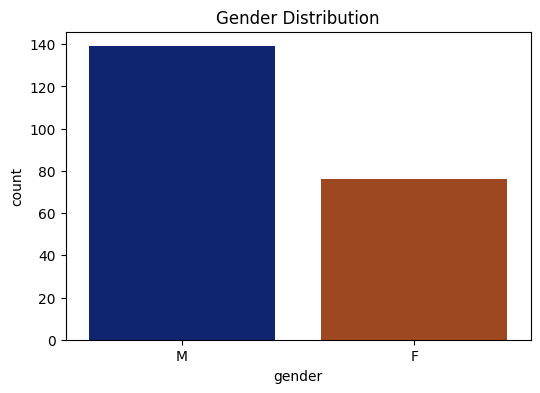

In [18]:
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=placement_data, palette='dark')
plt.title('Gender Distribution')
plt.show()

## **Histogram of SSC percentage**

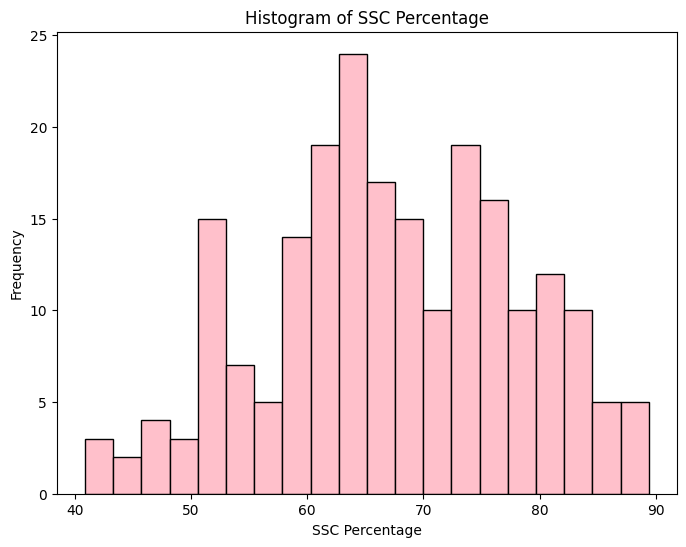

In [19]:

plt.figure(figsize=(8, 6))
plt.hist(placement_data['ssc_percent'], bins=20, color='pink', edgecolor='black')
plt.title('Histogram of SSC Percentage')
plt.xlabel('SSC Percentage')
plt.ylabel('Frequency')
plt.show()

## **Scatter plot of SSC percentage vs. HSC percentage**

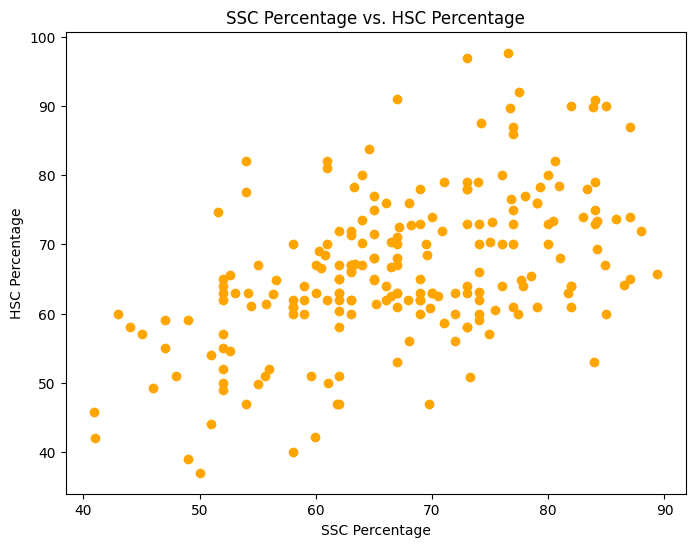

In [20]:

plt.figure(figsize=(8, 6))
plt.scatter(placement_data['ssc_percent'], placement_data['hsc_percent'], color='orange')
plt.title('SSC Percentage vs. HSC Percentage')
plt.xlabel('SSC Percentage')
plt.ylabel('HSC Percentage')
plt.show()

## **Work experience distribution**

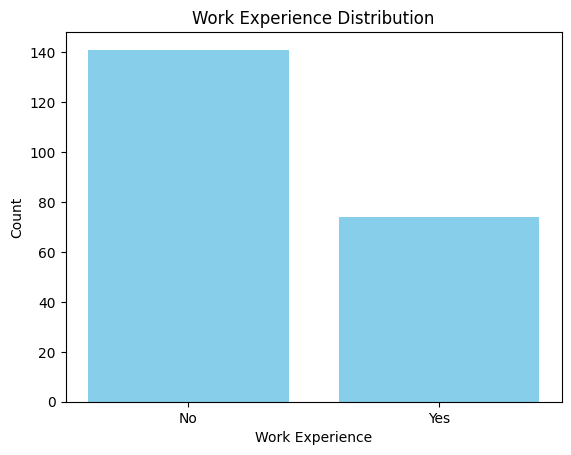

In [21]:
work_exp_counts = placement_data['work_exp'].value_counts()
plt.bar(work_exp_counts.index, work_exp_counts.values, color='skyblue')
plt.xlabel('Work Experience')
plt.ylabel('Count')
plt.title('Work Experience Distribution')
plt.show()


## **Aptitude score distribution**

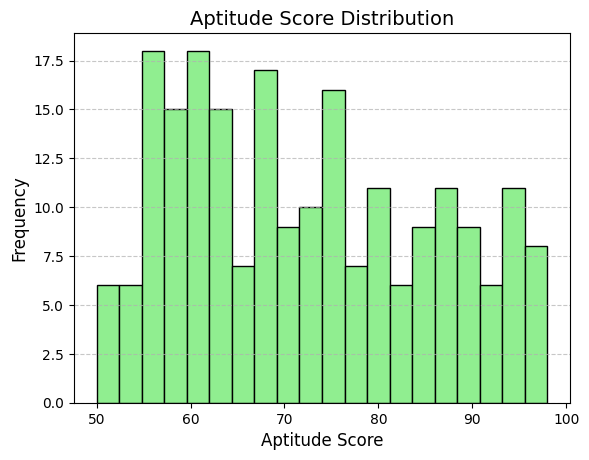

In [22]:
plt.hist(placement_data['aptitude_score'], bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Aptitude Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Aptitude Score Distribution', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## **Placement status**

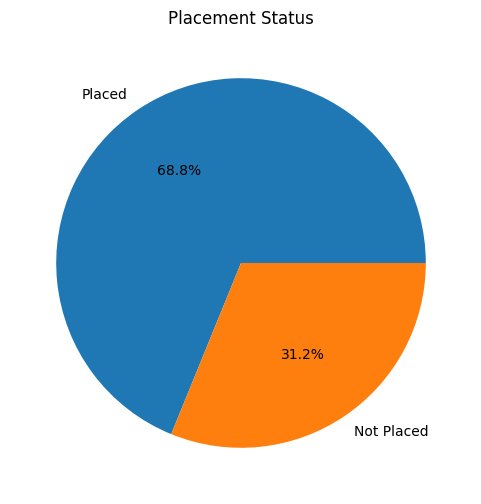

In [23]:
status_counts = placement_data['status'].value_counts()
plt.figure(figsize=(6, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Custom dark colors

plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Placement Status')
plt.show()


## **Salary distribution for placed students**

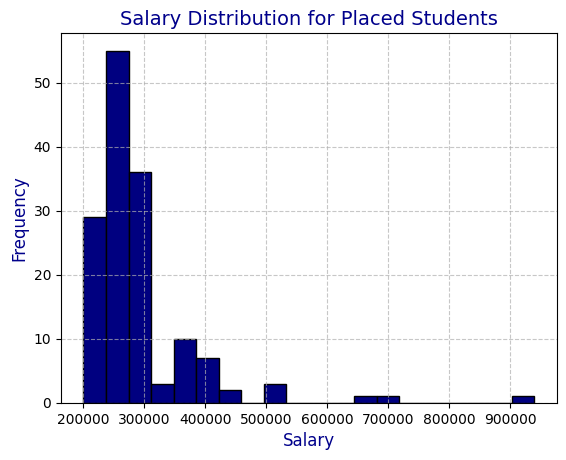

In [24]:
plt.hist(placement_data[placement_data['status'] == 'Placed']['salary'], bins=20, color='navy', edgecolor='black')
plt.xlabel('Salary', fontsize=12, color='darkblue')
plt.ylabel('Frequency', fontsize=12, color='darkblue')
plt.title('Salary Distribution for Placed Students', fontsize=14, color='darkblue')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


## **Company-wise placements**

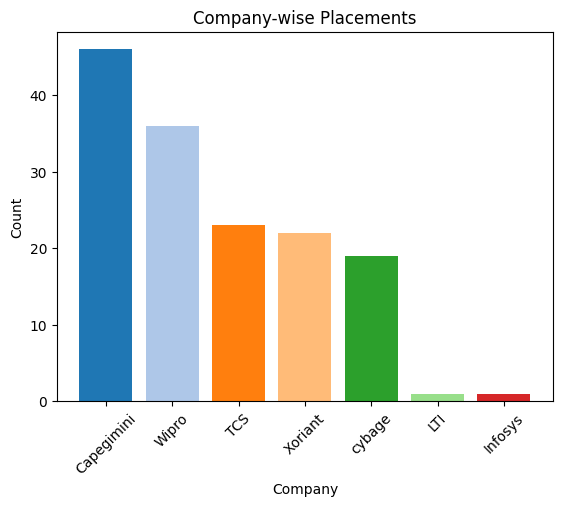

In [25]:

company_counts = placement_data[placement_data['status'] == 'Placed']['Company_name'].value_counts()
colors = plt.cm.tab20.colors[:len(company_counts)]
plt.bar(company_counts.index, company_counts.values,color=colors)
plt.xlabel('Company')
plt.ylabel('Count')
plt.title('Company-wise Placements')
plt.xticks(rotation=45)
plt.show()


<Figure size 800x600 with 0 Axes>

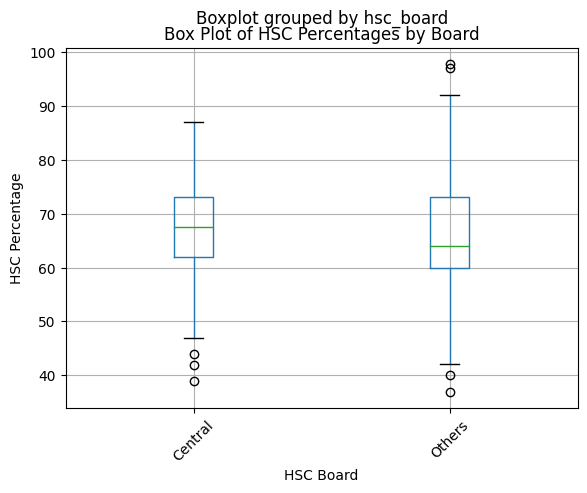

In [26]:
plt.figure(figsize=(8,6))
placement_data.boxplot(column='hsc_percent', by='hsc_board')
plt.xlabel('HSC Board')
plt.ylabel('HSC Percentage')
plt.title('Box Plot of HSC Percentages by Board')
plt.xticks(rotation=45)
plt.show()


## **Pie Chart of Department Distribution**

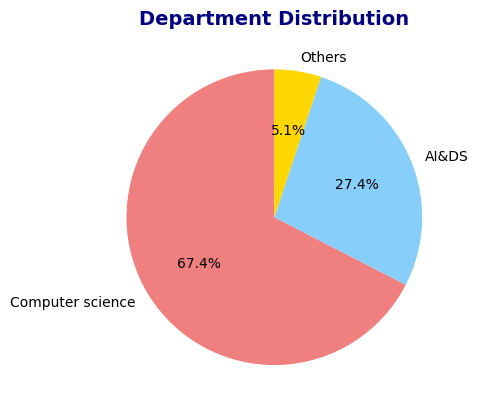

In [27]:
department_counts = placement_data['Department'].value_counts()
colors = ['lightcoral', 'lightskyblue', 'gold']
department_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Department Distribution', fontsize=14, fontweight='bold', color='navy')
plt.ylabel('')
plt.show()

## **Box Plot of Aptitude Scores by Specialization:**

<Figure size 1000x600 with 0 Axes>

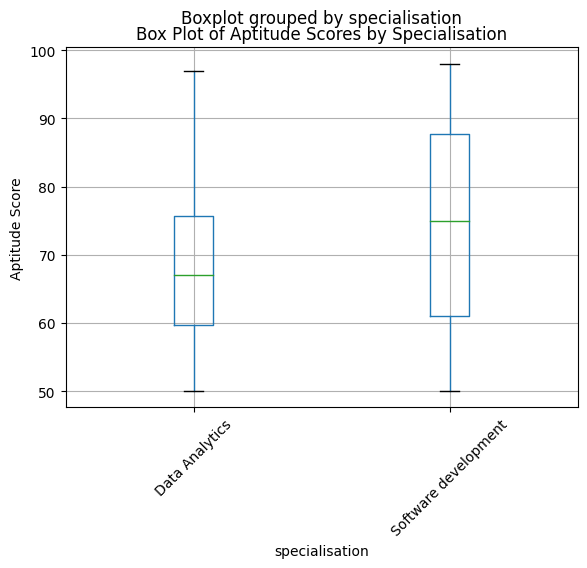

In [28]:
plt.figure(figsize=(10,6))
placement_data.boxplot(column='aptitude_score', by='specialisation')
plt.xlabel('specialisation')
plt.ylabel('Aptitude Score')
plt.title('Box Plot of Aptitude Scores by Specialisation')
plt.xticks(rotation=45)
plt.show()


## **Histogram of Degree Percentages**

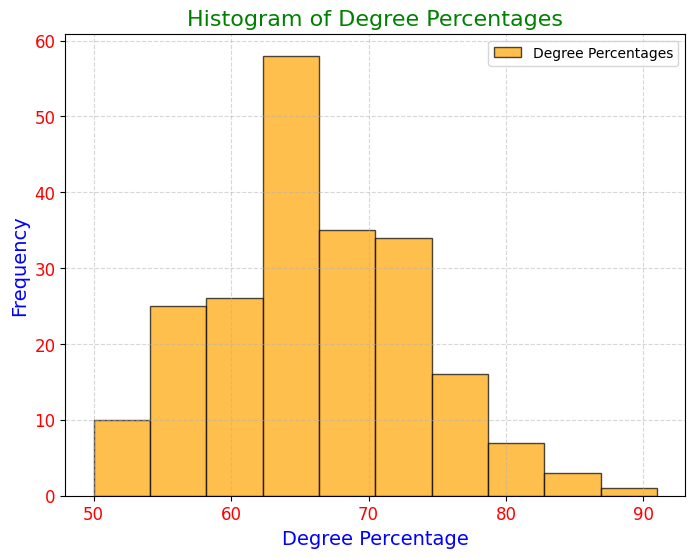

In [29]:
plt.figure(figsize=(8, 6))
plt.hist(placement_data['degree_percent'], bins=10, color='orange', edgecolor='black', alpha=0.7)
plt.xlabel('Degree Percentage', fontsize=14, color='blue')
plt.ylabel('Frequency', fontsize=14, color='blue')
plt.title('Histogram of Degree Percentages', fontsize=16, color='green')

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(['Degree Percentages'], loc='upper right')

plt.xticks(fontsize=12, color='red')
plt.yticks(fontsize=12, color='red')

plt.show()


## **Bar Plot of Job Status:**

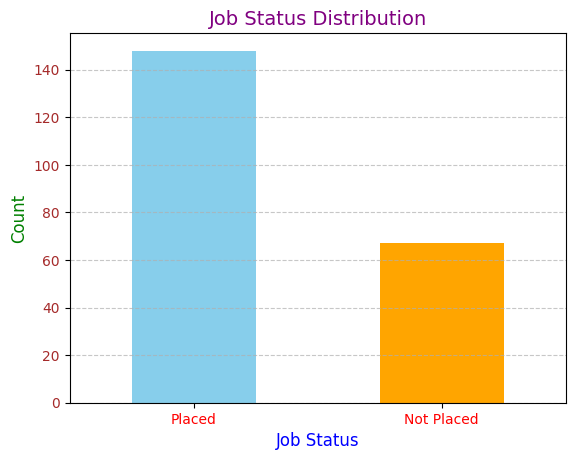

In [ ]:

status_counts = placement_data['status'].value_counts()

status_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.xlabel('Job Status', fontsize=12, color='blue')
plt.ylabel('Count', fontsize=12, color='green')
plt.title('Job Status Distribution', fontsize=14, color='purple')
plt.xticks(rotation=0, color='red')
plt.yticks(color='brown')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**To predict the "Gender" column based on the other features **

In [51]:


# Load the dataset
placement_data = pd.read_csv('Placement_Data.csv')

# Handle categorical variables
categorical_columns = ['ssc_board', 'hsc_board', 'Department', 'specialisation', 'status', 'Company_name']
placement_data = pd.get_dummies(placement_data, columns=categorical_columns)

# Encode binary categorical variables
binary_columns = ['work_exp']
label_encoder = LabelEncoder()
for col in binary_columns:
    placement_data[col] = label_encoder.fit_transform(placement_data[col])

# Convert 'gender' to numerical
label_encoder = LabelEncoder()
placement_data['gender'] = label_encoder.fit_transform(placement_data['gender'])

# Select features and target
X = placement_data[['ssc_percent', 'hsc_percent', 'work_exp', 'aptitude_score', 'degree_percent']]
y = placement_data['gender']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6744186046511628
